<a href="https://colab.research.google.com/github/sasichintada/ml-workshop/blob/main/EDA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Google Play Store Apps Dataset**

The Google Play Store Apps dataset provides a list of Android applications available on the Google Play Store. This dataset is commonly used for Exploratory Data Analysis (EDA) and machine learning tasks, as it contains useful information about various apps, including their characteristics, ratings, and performance.

The dataset can be downloaded from kaggle

**App** : The name of the app available on the Google Play Store

**Category** : classification of the app, such as Games, Business etc.

**Rating**: user rating of the app.

**Reviews**: The total number of reviews given to the app by users.

**Size**: size of the app in MB or KB.

**Installs**: The number of times the app has been installed,represented in categories like 1,000+, 10,000+, etc

**Type**: Whether the app is free or paid

**Price**: The price of the app if it is paid.

**Content Rating**: The age group for which the app is suitable (e.g., Everyone, Teen)

**Genres**: The specific genre of the app, like Action, Puzzle, Health & Fitness, etc

**Last Updated**: The date when the app was last updated Current Ver: The current version of the app available on the Google Play Store

**Android Ver**: The minimum Android version required for the app

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the data
playstore=pd.read_csv('/content/googleplaystore.csv')
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
playstore.shape

(10841, 13)

In [ ]:
#overview of dataset structure
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#columns having missing values
playstore.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


**The** **columns** **having** **null** **values** **are** : Rating, Type, Content Rating, Current Ver, Android Ver.

**Features**: The google play store dataset has the following types of features

**Categorical/Nominal** : Variables that can be divided into multiple categories but having no order or priority

    Example : Category,Content Rating,Genres

**Binary** : A subtype of categorical features, where the variable has only two categories.

    Example : Type

**Ordinal** : They are similar to categorical features but they have an order(i.e can be sorted).

    Example : Rating

**Continuous** : They can take up any value between the minimum and maximum values in a column

    Example : Size, Installs, Price

**Count** : They represent the count of a variable

    Example : Reviews

**Useless** : They don’t contribute to the final outcome of an ML model.

    Example : App, Last Updated, Current Ver, Android Ver



In [ ]:
#dropping unnecessary columns
playstore.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [ ]:
playstore.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


### **Converting** **into** **appropriate** **datatypes**

In [ ]:
#price column
# Replace free with 0,remove signs and commas and convert to numeric
playstore['Price'] = playstore['Price'].replace({'\$': '', ',': '', 'Free': '0'}, regex=True)
playstore['Price'] = pd.to_numeric(playstore['Price'], errors='coerce')
playstore['Price'] = playstore['Price'].fillna(playstore['Price'].median())

# Installs column
# Remove the symbols and convert to numeric
playstore['Installs'] = playstore['Installs'].replace({'\+': '', ',': ''}, regex=True)
playstore['Installs'] = pd.to_numeric(playstore['Installs'], errors='coerce')
playstore['Installs'] = playstore['Installs'].fillna(0).astype(int)

# Handle missing values in Rating
# Remove rows where 'Price' column has missing values
playstore = playstore.dropna(subset=['Price'])

#Handle missing values in Type
playstore['Type'] = playstore['Type'].fillna('Free')

#Handle missing values in Content Rating
playstore['Content Rating'] = playstore['Content Rating'].fillna(playstore['Content Rating'].mode()[0])

print(playstore.isnull().sum())


Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64


##**Exploratory data analysis**

####**Histogram plot**

 Histogram is a type of graphical representation that shows the distribution of a single numerical variable by dividing the data
 The histogram gives you a way to understand the distribution of the data, showing how the values of a variable are spread out and whether there are any patterns, such as skewness or peaks

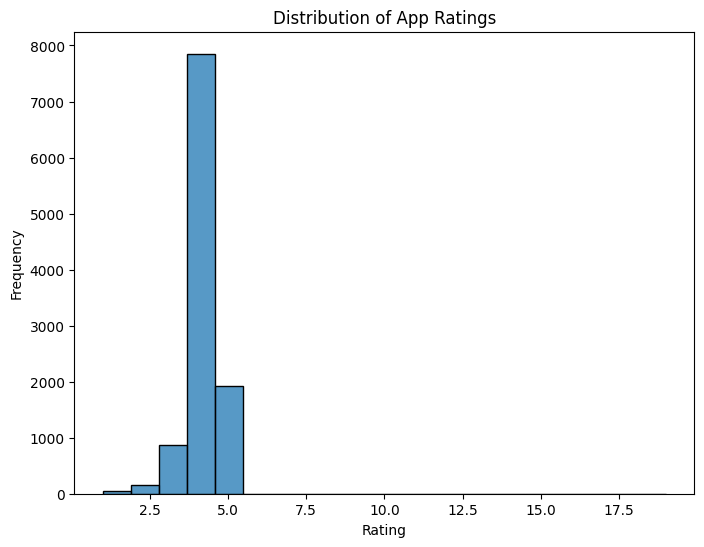

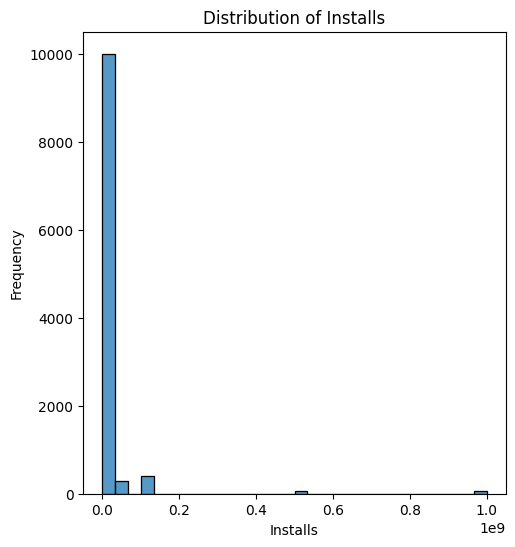

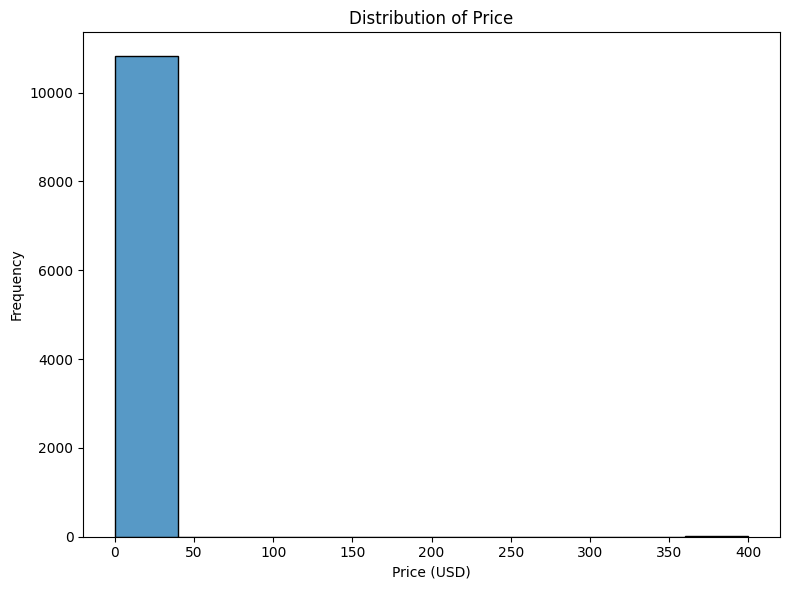

In [ ]:
# histogram for Ratings
plt.figure(figsize=(8, 6))
sns.histplot(playstore['Rating'], bins=20)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.figure(figsize=(12, 6))

# Plot histogram for Installs
plt.subplot(1, 2, 2)
sns.histplot(playstore['Installs'], bins=30)
plt.title('Distribution of Installs')
plt.xlabel('Installs')
plt.ylabel('Frequency')


#histogram for prices
plt.figure(figsize=(8, 6))
sns.histplot(playstore['Price'], bins=10, kde=False)
plt.title('Distribution of Price')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




**Observations**


*   Most apps likely have ratings between 3 and 5


*   Most of the apps are free very less apps are paid

*  Most apps have relatively few installs, while a few apps dominate with millions or billions of installs.


*   Skew towards higher ratings: The apps to have ratings of 4.0 or higher, reflecting overall user satisfaction.







####**Box Plot**

A box plot (also known as a box-and-whisker plot) is a graphical representation used to show the distribution of a dataset. The box plot shows how spread out the data is by looking at the length of the box and the whiskers.

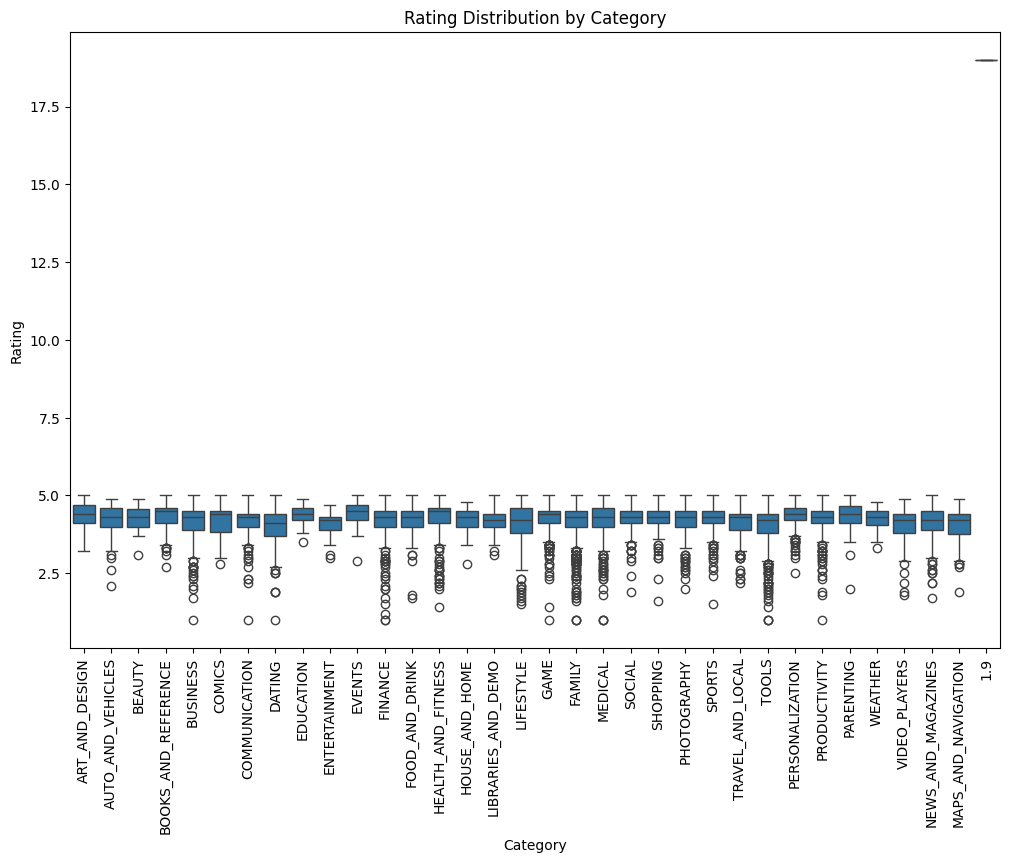

In [ ]:
# Box plot for rating distribution by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Rating', data=playstore)
plt.title('Rating Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


**Observations**


*   Categories like medical have more varied ratings, while games have more consistent ratings

*   Some categories show extreme outliers in ratings

*   Median ratings vary by category,some categories generally having higher medians than the other



*   some categories like finance,tools have more outliers less than the
    25 percentile
    

*   No category has outliers more than 75 percentile most of them lies between the median







####**Bar Plot**

Bar plot provides a summary of the number of apps in each category and can be useful for understanding app distribution trends and identifying market opportunities

Text(0, 0.5, 'Category')

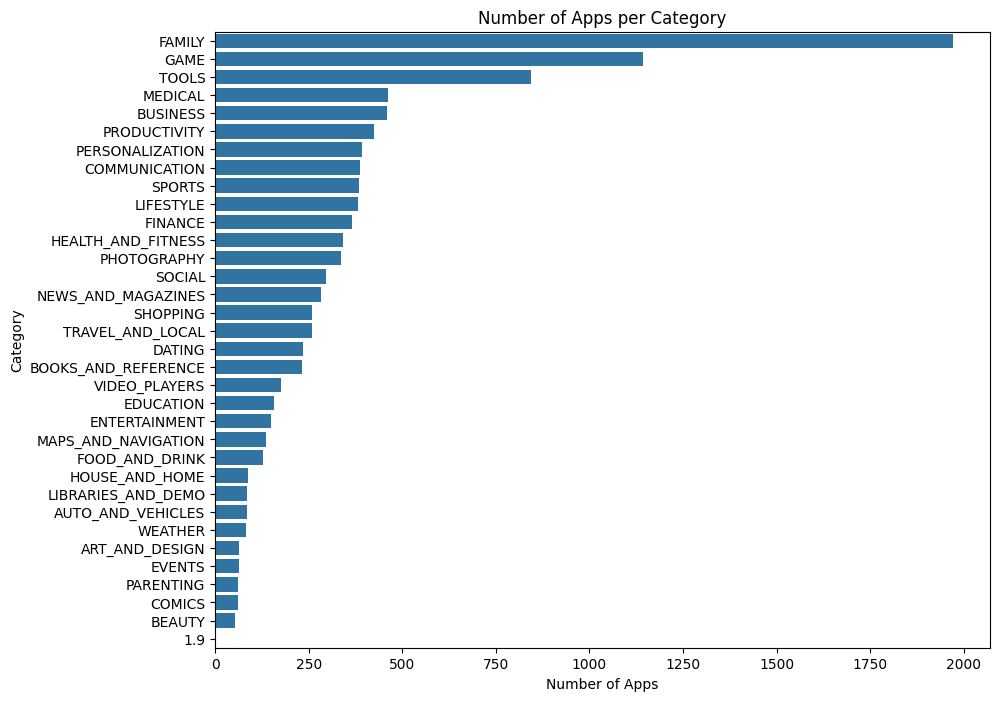

In [ ]:
# Number of Apps per Category

plt.figure(figsize=(10, 8))
category_counts = playstore['Category'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Number of Apps per Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')

**Observations**


* Categories like family,game,medical and tools having more than 1750 apps
* Some having less than 250 apps in their respective categories
*    Categories like Beauty, Education, and Weather could have fewer apps, indicating niches with less competition




###**Scatter Plot**

A scatter plot is a simple visual tool used to show the relationship between two numerical variables. It helps you understand patterns, trends, and correlations between the variables by plotting them as dots on a grid.

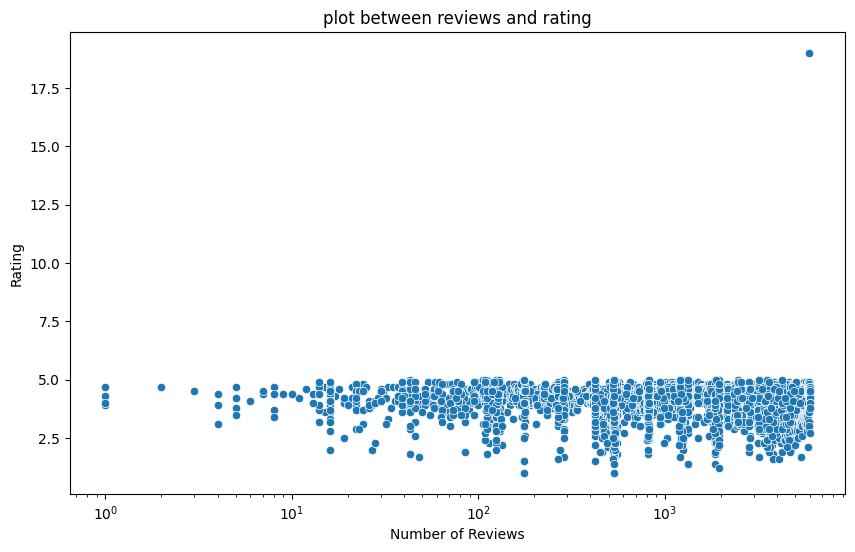

In [ ]:
#Scatter plot of Ratings vs. Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating',data=playstore)
plt.title('plot between reviews and rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

**Observations**


*   There are a few apps with very high ratings but very few reviews. These apps might be new
*  Generally, apps with more reviews tend to have higher ratings. Apps with fewer reviews can have more variability in ratings.

* Apps with a lot of reviews are often more established, but there might be new apps that are not yet reviewed but could have good ratings


*   Most of the apps have many number of reviews and their rating lies between 2.5 and 5



####**PairPlot**

A pairplot is a grid of scatter plots that shows the relationships between multiple numerical variables in a dataset, along with histograms or density plots on the diagonal to show the distribution of each individual variable. It helps visualize correlations and patterns between several variables at once.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


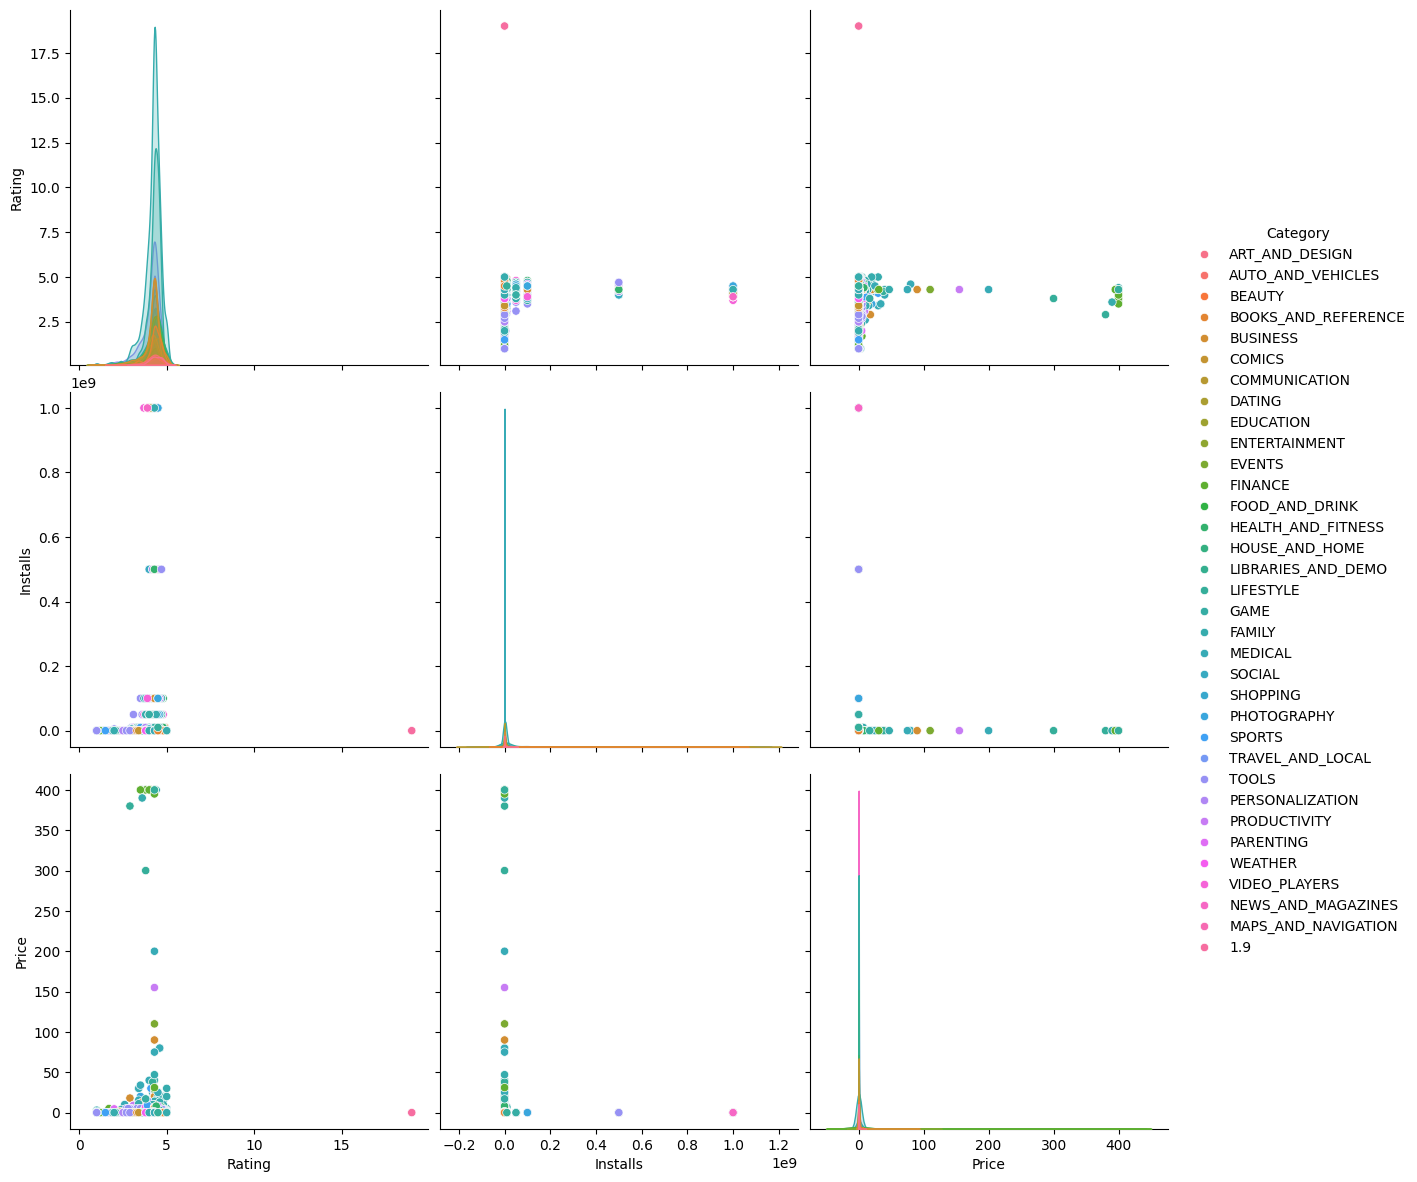

In [ ]:
sns.pairplot(data = playstore, hue="Category", size=4)
plt.show()

**Observations**


* The pairplot shows the pairwise relationships between the numeric variables in the dataset (Rating, Price, Reviews, Installs)
* It gives the relation between the numeric columns


*  Outliers or unusual data points, such as apps with extreme values







####**stripplot**

A stripplot is a type of scatter plot that displays individual data points along an axis, usually with a categorical variable on the x-axis and a numerical variable on the y-axis, helping to visualize the distribution and spread of data points within each category.

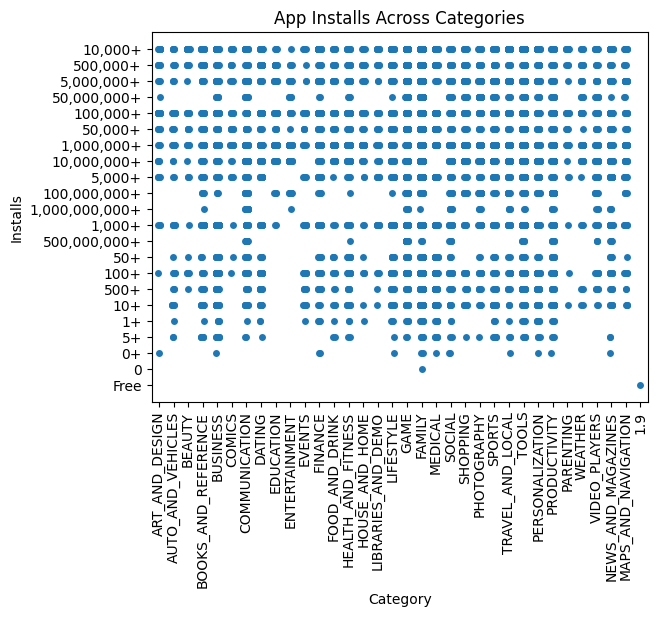

In [ ]:
# Stripplot Installs across different app categories
sns.stripplot(x='Category', y='Installs', data=playstore,jitter=True)
plt.xticks(rotation=90)
plt.title('App Installs Across Categories')
plt.show()


**Observations**



*   Smaller categories may have apps with fewer installs or show more variability in install counts.



* Outliers may be present, showing apps with unusually high install counts in some categories.


* The plot shows distribution skewness and helps identify whether any app category is dominated by a few top performers or if the installs are more evenly distributed across apps


###**Heatmaps**

A heatmap is a graphical representation of data where values are displayed in a matrix and represented by colors, making it easy to visualize patterns, correlations, or variations in the data.

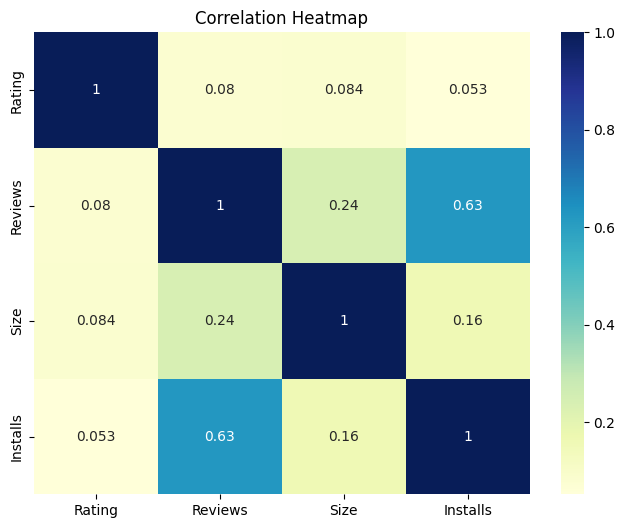

In [ ]:
#correlation matrix
numerical_cols = ['Rating', 'Reviews', 'Size', 'Installs']
corr_matrix = playstore[numerical_cols].corr()

#Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()


**Observations**

*  It shows how key variables like Rating, Reviews, Size, and Installs are related to each other.

*  Installs and Reviews are strongly related, meaning apps with more installs tend to have more reviews.
*  Size may not strongly correlate with other variables, showing that app size doesn’t impact ratings or installs much.



* The heatmap can help spot unusual data points or patterns, like apps with lots of reviews but low ratings.
